In [1]:
import warnings
warnings.filterwarnings("ignore")

import scipy.io
import scipy.stats
import random
import numpy as np
import os
import itertools
import pickle as pk
import seaborn as sns

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

import sys, os
sys.path.append("/Users/xiaoxuanj/Dropbox/jim_data/human_behavior/800_rep/")


In [2]:
def find_nearest(array, values):
    index = np.abs(np.subtract.outer(array, values)).argmin(0)
    return index

# add error rate to all four quadrates
def d_feature_to_measure(d_feature, errorrate):
    x = np.linspace(0,1,100000)
    d = norm.ppf(x)-norm.ppf(1-x)
    
    d_measure = []
    for df in d_feature:
        values = df
        hitrate = x[find_nearest(d, values)]
        p = errorrate # add error rate to all squares and renormalize
        hitrate_new = (hitrate+p)/(1+2*p)
        #fa = ((1-hitrate)+p)/(1+2*p)
        d_measure.append(norm.ppf(hitrate_new)-norm.ppf(1-hitrate_new))
        
    d_measure = np.array(d_measure)
    return d_measure

def convert_lapse_rate(errorrate):
    # error rate is a number added to all quadrants of the confusion matrix
    return 4*errorrate/(2+4*errorrate)

In [3]:
def confidence_interval(tmp, alpha=0.95):
    if len(tmp)>0:
        # confidence intervals
        p = ((1.0-alpha)/2.0) * 100
        lower = np.percentile(tmp, p)
        p = (alpha+((1.0-alpha)/2.0)) * 100
        upper = np.percentile(tmp, p)
        print('95% confidence interval ', upper, lower, )
        return upper, lower
    else:
        return 'invalid'

In [4]:
# p-value for bootstrapped disribution (samples)
# direct calculation: The simplest computation is to apply the definition of a p-value. 
# To do this, count the number of values (statistics) that are greater than or equal to the observed value, and divide by the number of values. 

def get_pval(tmp, val, m='left'):
    # tmp is a normal distribution of bootstrapped samples
    if len(tmp)>10:
        if m=='left':
            # distribution with mean smaller than 0
            pval = len(np.where(tmp>=0)[0])/len(tmp)
        else:
            # distribution with mean larger than 0
            pval = len(np.where(tmp<=0)[0])/len(tmp)
        return pval
    else:
        print('empty entry')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.7081287506819421, 0.7278338945005611, 0.8385753931544866]
0.5947568183077061 0.387
1.0531940298199005 0.036
2.202470022603634 0.7896341463414634
[1.0, 0.9139854696419305, 0.7923076923076924]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


1.6578812181534848 0.0
2.4002060309026505 0.6343042071197411
1.9245336426542523 0.09428284854563691
[1.0, 0.84375, 1.0]
2.096331274556493 0.04895104895104895
empty entry
1.4778512981423555 None
empty entry
-- None


No handles with labels found to put in legend.


[0.95, 0.5277777777777778, 0.5757575757575758]
0.5496709159052557 0.3054003724394786
0.3856742951345758 0.3948497854077253
0.3329977258087445 0.7254641909814323
[0.9428355957767722, 0.9074145962732919, 0.8953442879499218]
2.267815072838984 0.082
2.5249911444544866 0.057750759878419454
2.5781276613167643 0.386


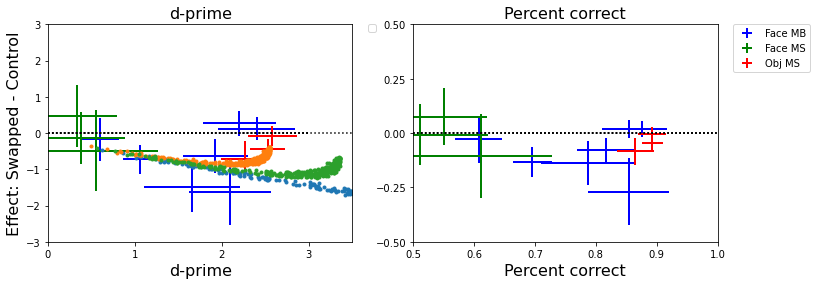

In [33]:
# figure 6
val = 0

fig = plt.figure(figsize=(12, 4))
with open("learning_face_summary_effect_newpairs_version3", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [percent_b,effect_percent_mb,dprime_b,effect_dprime_mb] = u.load()

x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
task1_p = np.array(percent_b)[:,x.mask==False]
task1_d = np.array(dprime_b)[:,x.mask==False]

print(max(percent_b))  
initial_d=[]
effect=[]
effect_std=[]
plt.subplot(121)
plt.errorbar(np.ma.masked_invalid(dprime_b).mean(0),np.ma.masked_invalid(effect_dprime_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_dprime_mb).std(0),
             xerr=np.ma.masked_invalid(dprime_b).std(0),
             ecolor = 'b',ls='none',elinewidth=2)
plt.plot([0,3],[0,0],':k')
plt.title('d-prime',fontsize=16)
plt.xlabel('d-prime',fontsize=16)
plt.ylabel('Effect: Swapped - Control',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-3,3)
initial_d.append(np.ma.masked_invalid(dprime_b).mean(0))
effect.append(np.ma.masked_invalid(effect_dprime_mb).mean(0))
effect_std.append(np.ma.masked_invalid(effect_dprime_mb).std(0))

# t-test compared to 0
from scipy.stats import ttest_ind, ttest_1samp
for i in np.arange(3):
    tmp = np.array(effect_dprime_mb)[:,i] 
    tmp = tmp[np.where(abs(tmp)!=np.inf)[0]]
    tmp = tmp[np.where(np.isnan(tmp)!=1)[0]]
    pval = get_pval(tmp, val, m='left')
    print(np.ma.masked_invalid(dprime_b).mean(0)[i],pval)
    

plt.subplot(122)
plt.errorbar(np.ma.masked_invalid(percent_b).mean(0)[x.mask==False],np.ma.masked_invalid(effect_percent_mb).mean(0)[x.mask==False], 
             yerr=np.ma.masked_invalid(effect_percent_mb).std(0)[x.mask==False],
             xerr=np.ma.masked_invalid(percent_b).std(0)[x.mask==False],
             ecolor = 'b',ls='none',elinewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0.5, 1],[0,0],':k')
plt.xlim(0.5,1)
plt.ylim(-0.5,0.3)

plt.title('Percent correct',fontsize=16)
plt.xlabel('Percent correct',fontsize=16)

with open("learning_face_summary_effect_newpairs_version2", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [percent_b,effect_percent_mb,dprime_b,effect_dprime_mb] = u.load()

x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
task2_p = np.array(percent_b)[:,x.mask==False]
task2_d = np.array(dprime_b)[:,x.mask==False]
print(max(percent_b))
plt.subplot(121)
plt.errorbar(np.ma.masked_invalid(dprime_b).mean(0),np.ma.masked_invalid(effect_dprime_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_dprime_mb).std(0),
             xerr=np.ma.masked_invalid(dprime_b).std(0),
             ecolor = 'b',ls='none',elinewidth=2)
plt.plot([0,3],[0,0],':k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
initial_d.append(np.ma.masked_invalid(dprime_b).mean(0))
effect.append(np.ma.masked_invalid(effect_dprime_mb).mean(0))
effect_std.append(np.ma.masked_invalid(effect_dprime_mb).std(0))

for i in np.arange(3):
    tmp = np.array(effect_dprime_mb)[:,i] 
    tmp = tmp[np.where(abs(tmp)!=np.inf)[0]]
    tmp = tmp[np.where(np.isnan(tmp)!=1)[0]]
    pval = get_pval(tmp, val, m='left')
    print(np.ma.masked_invalid(dprime_b).mean(0)[i],pval)

x = np.ma.masked_invalid(effect_dprime_mb).mean(0)

plt.subplot(122)
plt.errorbar(np.ma.masked_invalid(percent_b).mean(0)[x.mask==False],np.ma.masked_invalid(effect_percent_mb).mean(0)[x.mask==False], 
             yerr=np.ma.masked_invalid(effect_percent_mb).std(0)[x.mask==False],
             xerr=np.ma.masked_invalid(percent_b).std(0)[x.mask==False],
             ecolor = 'b',ls='none',elinewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0.5, 1],[0,0],':k')
plt.xlim(0.5,1)

with open("learning_face_summary_effect_oldpairs_MB", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [percent_b,effect_percent_mb,dprime_b,effect_dprime_mb] = u.load()
x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
task3_p = np.array(percent_b)[:,x.mask==False]
task3_d = np.array(dprime_b)[:,x.mask==False]
print(max(percent_b))
plt.subplot(121)
plt.errorbar(np.ma.masked_invalid(dprime_b).mean(0),np.ma.masked_invalid(effect_dprime_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_dprime_mb).std(0),
             xerr=np.ma.masked_invalid(dprime_b).std(0),
             ecolor = 'b',ls='none',elinewidth=2)
plt.plot([0,3],[0,0],':k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
initial_d.append(np.ma.masked_invalid(dprime_b).mean(0))
effect.append(np.ma.masked_invalid(effect_dprime_mb).mean(0))
effect_std.append(np.ma.masked_invalid(effect_dprime_mb).std(0))

for i in np.arange(3):
    tmp = np.array(effect_dprime_mb)[:,i] 
    tmp = tmp[np.where(abs(tmp)!=np.inf)[0]]
    tmp = tmp[np.where(np.isnan(tmp)!=1)[0]]
    pval = get_pval(tmp, val, m='left')
    print(np.ma.masked_invalid(dprime_b).mean(0)[i], pval)


x = np.ma.masked_invalid(effect_dprime_mb).mean(0)

plt.subplot(122)
plt.errorbar(np.ma.masked_invalid(percent_b).mean(0)[x.mask==False],np.ma.masked_invalid(effect_percent_mb).mean(0)[x.mask==False], 
             yerr=np.ma.masked_invalid(effect_percent_mb).std(0)[x.mask==False],
             xerr=np.ma.masked_invalid(percent_b).std(0)[x.mask==False],
             ecolor = 'b', label = 'Face MB',ls='none',elinewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0.5, 1],[0,0],':k')
plt.xlim(0.5,1)

with open("learning_face_summary_effect_oldpairs_MS", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [percent_b,effect_percent_mb,dprime_b,effect_dprime_mb] = u.load()
x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
task4_p = np.array(percent_b)[:,x.mask==False]
task4_d = np.array(dprime_b)[:,x.mask==False]
print(max(percent_b))
plt.subplot(121)
plt.errorbar(np.ma.masked_invalid(dprime_b).mean(0),np.ma.masked_invalid(effect_dprime_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_dprime_mb).std(0),
             xerr=np.ma.masked_invalid(dprime_b).std(0),
             ecolor = 'g',ls='none',elinewidth=2)
plt.plot([0,3],[0,0],':k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks([-3,-1.5,0,1.5,3])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
initial_d.append(np.ma.masked_invalid(dprime_b).mean(0))
effect.append(np.ma.masked_invalid(effect_dprime_mb).mean(0))
effect_std.append(np.ma.masked_invalid(effect_dprime_mb).std(0))

for i in np.arange(3):
    tmp = np.array(effect_dprime_mb)[:,i] 
    tmp = tmp[np.where(abs(tmp)!=np.inf)[0]]
    tmp = tmp[np.where(np.isnan(tmp)!=1)[0]]
    pval = get_pval(tmp, val, m='left')
    print(np.ma.masked_invalid(dprime_b).mean(0)[i],pval)


x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
plt.subplot(122)
plt.errorbar(np.ma.masked_invalid(percent_b).mean(0)[x.mask==False],np.ma.masked_invalid(effect_percent_mb).mean(0)[x.mask==False], 
             yerr=np.ma.masked_invalid(effect_percent_mb).std(0)[x.mask==False],
             xerr=np.ma.masked_invalid(percent_b).std(0)[x.mask==False],
             ecolor = 'g', label = 'Face MS',ls='none',elinewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0.5, 1],[0,0],':k')
plt.xlim(0.5,1)
plt.yticks([-0.5,-0.25,0,0.25,0.5])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')

with open("learning_obj_summary_effect_newpairs_version1", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [percent_b,effect_percent_mb,dprime_b,effect_dprime_mb] = u.load()
x = np.ma.masked_invalid(effect_dprime_mb).mean(0)
task5_p = np.array(percent_b)[:,x.mask==False]
task5_d = np.array(dprime_b)[:,x.mask==False]
print(max(percent_b)) 
plt.subplot(121)
plt.errorbar(np.ma.masked_invalid(dprime_b).mean(0),np.ma.masked_invalid(effect_dprime_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_dprime_mb).std(0),
             xerr=np.ma.masked_invalid(dprime_b).std(0),
             ecolor = 'r',ls='none',elinewidth=2)
initial_d.append(np.ma.masked_invalid(dprime_b).mean(0))
effect.append(np.ma.masked_invalid(effect_dprime_mb).mean(0))
effect_std.append(np.ma.masked_invalid(effect_dprime_mb).std(0))


for i in np.arange(3):
    tmp = np.array(effect_dprime_mb)[:,i] 
    tmp = tmp[np.where(abs(tmp)!=np.inf)[0]]
    tmp = tmp[np.where(np.isnan(tmp)!=1)[0]]
    pval = get_pval(tmp, val, m='left')
    print(np.ma.masked_invalid(dprime_b).mean(0)[i],pval)

    
x = np.ma.masked_invalid(effect_dprime_mb).mean(0)

plt.subplot(122)
plt.errorbar(np.ma.masked_invalid(percent_b).mean(0),np.ma.masked_invalid(effect_percent_mb).mean(0), 
             yerr=np.ma.masked_invalid(effect_percent_mb).std(0),
             xerr=np.ma.masked_invalid(percent_b).std(0),
             ecolor = 'r', label = 'Obj MS', ls='none',elinewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(121)
#plt.plot(pre_m.mean(1),delta_b.mean(2)[1],'.')
#plt.plot(dm_pre_m,effect_d,'.')
plt.plot(pre, (post-pre), '.')
plt.plot(pre_obs, (post_obs-pre_obs), '.')
plt.plot(pre_obs2, (post_obs2-pre_obs2), '.')


plt.ylim([-3,3])
plt.xlim([-0,3.5])
plt.yticks([-3,-2,-1,0,1,2,3])
plt.xticks(np.arange(4))
plt.plot([0,3.5],[0,0],':k')
#plt.savefig('learning_effect.pdf')

plt.savefig('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/model_IT/learning_effect_with_lapse_corrected_new.pdf')


# simulate relationship between d measured and d predicted

0.0
0.0196078431372549
0.09090909090909091
0.2
0.5


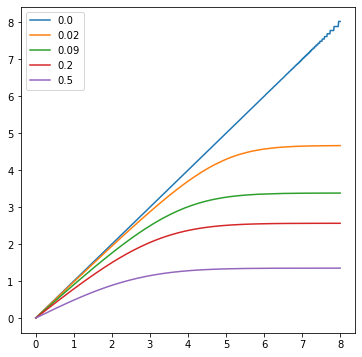

In [5]:
d_feature = np.linspace(0,8,801) 
all_err = [0,0.01,0.05,0.125,0.5]
plt.figure(figsize=(6,6))
for errorrate in all_err:
    d_measure = d_feature_to_measure(d_feature, errorrate)
    lapse = convert_lapse_rate(errorrate)
    print(lapse)
    plt.plot(d_feature, d_measure, label = round(lapse,2))
    
plt.legend()
#plt.savefig('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/model_IT/lapse_corrected.pdf')


# fit model with/without lapse

In [34]:
# load model prediction for all simulated object pairs and images
path = '/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_IT_model_U_top41_nojitter_allpairs_diff/'
# 5 is number of boots
post_b = np.load(path+'post_b.npy')
pre_b = np.load(path+'pre_b.npy')
pre_m = np.load(path+'pre_m.npy')


# final figure pre and post
pre = pre_b.mean(1)
post = post_b.mean(1)[:,1]

In [32]:
np.save('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_IT_model_U_top3_jitter001_allpairs_diff_small/pre_figure6.npy',pre)
np.save('/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_IT_model_U_top3_jitter001_allpairs_diff_small/post_figure6.npy',post)

In [9]:
pre = np.load('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/figure6/pre_figure6.npy')
post = np.load('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/figure6/post_figure6.npy')

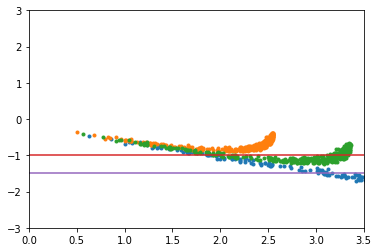

In [36]:
# final figure prediction
errorrate=0.125
pre[pre==np.inf]=np.NaN
post[post==np.inf]=np.NaN
pre_obs = d_feature_to_measure(pre, errorrate)
post_obs = d_feature_to_measure(post, errorrate)

errorrate=0.05
pre_obs2 = d_feature_to_measure(pre, errorrate)
post_obs2 = d_feature_to_measure(post, errorrate)

plt.plot(pre, (post-pre), '.')
plt.plot(pre_obs, (post_obs-pre_obs), '.')
plt.plot(pre_obs2, (post_obs2-pre_obs2), '.')

plt.ylim([-3,3])
plt.xlim([0,3.5])
plt.plot([0,3.5],[-1,-1])
plt.plot([0,3.5],[-1.5,-1.5])

0.2


Text(0.5, 1.0, 'Post')

<Figure size 432x432 with 0 Axes>

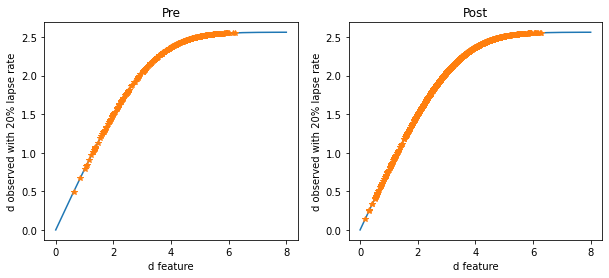

In [45]:
d_feature = np.linspace(0,8,801) 
errorrate = 0.125
plt.figure(figsize=(6,6))
d_measure = d_feature_to_measure(d_feature, errorrate)
lapse = convert_lapse_rate(errorrate)
print(lapse)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(d_feature, d_measure, label = round(lapse,2))
pre_obs = d_feature_to_measure(pre, errorrate)
plt.plot(pre, pre_obs, '*')
plt.xlabel('d feature')
plt.ylabel('d observed with 20% lapse rate')
plt.title('Pre')

plt.subplot(122)
plt.plot(d_feature, d_measure, label = round(lapse,2))
post_obs = d_feature_to_measure(post, errorrate)
plt.plot(post, post_obs, '*')
plt.xlabel('d feature')
plt.ylabel('d observed with 20% lapse rate')
plt.title('Post')

No handles with labels found to put in legend.


(-3, 3)

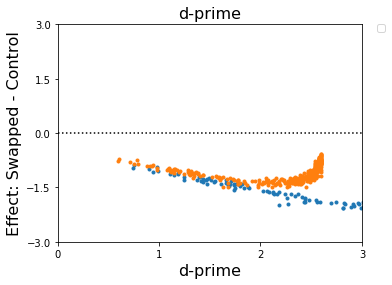

In [11]:
# mistake in previously saved effect size
# load model prediction for all simulated object pairs and images
path = '/Users/xiaoxuanj/Dropbox/jim_unsupervised_learning_paper/save_IT_model_U_top3_jitter001_allpairs_diff_small/'
#2016 pairs
#pre_b = np.load(path+'pre_b.npy')
post_b = np.load(path+'post_b.npy')
pre_m = np.load(path+'pre_m.npy')
#dm_pre_m = np.load(path+'dm_pre_m_er12.npy')
#effect_d = np.load(path+'effect_d_er12.npy')

#delta_b = np.array([post_b[:,:,i]-pre_b for i in range(2)])


fig = plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(pre_m.mean(1),delta_b.mean(2)[1],'.')


plt.plot(dm_pre_m,effect_d,'.')


plt.ylim([-3,3])
plt.xlim([-0,3])
plt.yticks([-3,-1.5,0,1.5,3])
plt.xticks(np.arange(4))
plt.plot([0,3],[0,0],':k')
plt.title('d-prime',fontsize=16)
plt.xlabel('d-prime',fontsize=16)
plt.ylabel('Effect: Swapped - Control',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-3,3)


# distribution of performance

In [20]:
task1_p.shape

(1000, 3)

In [6]:
max(percent_b)

[0.9428355957767722, 0.9074145962732919, 0.8953442879499218]

In [7]:
np.array(percent_b).mean(0)

array([0.86495721, 0.89302357, 0.89176136])

In [8]:
max(np.array(percent_b)[:,1])

0.94951564828614

Text(0.5, 1.0, 'Distribution of performance for all basic level tasks')

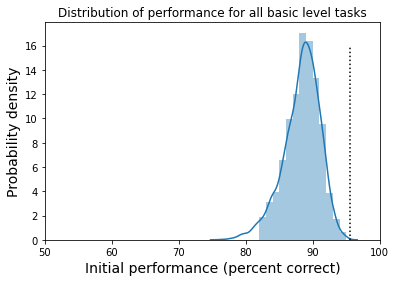

In [91]:
sns.distplot(np.array(percent_b).flatten(), bins=np.arange(0.82,0.96,0.01))
plt.xlim([0.5,1])
plt.xticks([0.5,0.6,0.7,0.8,0.9,1], [50,60,70,80,90,100])
plt.plot([0.955, 0.955],[0,16],':k')
plt.xlabel('Initial performance (percent correct)', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.title('Distribution of performance for all basic level tasks')
#plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/accuracy_distribution_basic.pdf')

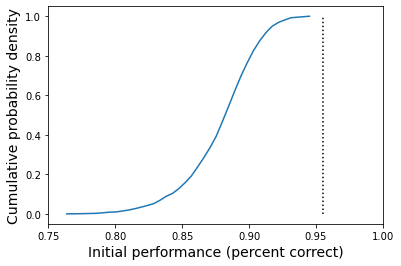

In [100]:
data = np.array(percent_b).flatten()
values, base = np.histogram(data, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)/max(np.cumsum(values))
# plot the cumulative function
plt.plot(base[:-1], cumulative)
plt.plot([0.955, 0.955],[0,1],':k')
plt.xlim([0.75,1])
plt.xlabel('Initial performance (percent correct)', fontsize=14)
plt.ylabel('Cumulative probability density', fontsize=14)
plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/accuracy_cum_distribution_basic.pdf')

In [56]:
d=[]
for tmp in initial_d:
    d.append(tmp.data)
    
e=[]
mask = []
for tmp in effect:
    e.append(tmp.data)
    mask.append(tmp.mask)
    
e_std=[]
for tmp in effect_std:
    e_std.append(tmp.data)


In [57]:
d = [item for sublist in d for item in sublist]
e = [item for sublist in e for item in sublist]
e_std = [item for sublist in e_std for item in sublist]
m = [not item for sublist in mask for item in sublist]

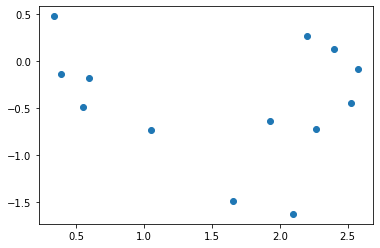

In [55]:
plt.scatter(np.array(d)[m], np.array(e)[m])

In [59]:
np.save('initial_difficulty_800exposure.npy',[np.array(d)[m], np.array(e)[m], np.array(e_std)[m]])

# try to estimate lapse rate

In [ ]:
# split half of subjects, rank difficulty, then plot performance

In [22]:
P = []
for boot in range(100):
    seq = np.arange(1000)
    np.random.shuffle(seq)

    percent1 = task1_p[seq[:500],:].mean(0)
    percent2 = task2_p[seq[:500],:].mean(0)
    percent3 = task3_p[seq[:500],:].mean(0)
    percent4 = task4_p[seq[:500],:].mean(0)
    percent5 = task5_p[seq[:500],:].mean(0)
    percent = np.concatenate([percent1, percent2,percent3,percent4,percent5,], axis=0)

    percent1 = task1_p[seq[500:],:].mean(0)
    percent2 = task2_p[seq[500:],:].mean(0)
    percent3 = task3_p[seq[500:],:].mean(0)
    percent4 = task4_p[seq[500:],:].mean(0)
    percent5 = task5_p[seq[500:],:].mean(0)
    percent_t = np.concatenate([percent1, percent2,percent3,percent4,percent5,], axis=0)
    
    P.append(percent_t[np.argsort(percent)])
P = np.array(P)

In [49]:
[task1_p.mean(0),task2_p.mean(0),task3_p.mean(0),task4_p.mean(0),task5_p.mean(0)]

[array([0.60751213, 0.69595188, 0.85413596]),
 array([0.78685445, 0.87606161, 0.8172791 ]),
 array([0.85398634]),
 array([0.61080445, 0.51131292, 0.5509491 ]),
 array([0.86495721, 0.89302357, 0.89176136])]

In [48]:
np.argsort(np.concatenate([task1_p.mean(0),task2_p.mean(0),task3_p.mean(0),task4_p.mean(0),task5_p.mean(0)], axis=0))

array([ 8,  9,  0,  7,  1,  3,  5,  6,  2, 10,  4, 12, 11])

In [69]:
import pandas as pd
df=pd.DataFrame()
df['rank']=np.concatenate([len(task1_p[:,0])*['0'],
                           len(task1_p[:,1])*['1'],
                           len(task1_p[:,2])*['2'],
                           len(task2_p[:,0])*['3'],
                           len(task2_p[:,1])*['4'],
                           len(task2_p[:,2])*['5'],
                           len(task3_p[:,0])*['6'],
                           len(task4_p[:,0])*['7'],
                           len(task4_p[:,1])*['8'],
                           len(task4_p[:,2])*['9'],
                           len(task5_p[:,0])*['10'],
                           len(task5_p[:,1])*['11'],
                           len(task5_p[:,2])*['12']], axis=0)



df['data']=np.concatenate([task1_p[:,0],task1_p[:,1],task1_p[:,2],task2_p[:,0],task2_p[:,1],
                           task2_p[:,2],task3_p[:,0],task4_p[:,0],task4_p[:,1],task4_p[:,2],
                           task5_p[:,0],task5_p[:,1],task5_p[:,2]], axis=0)


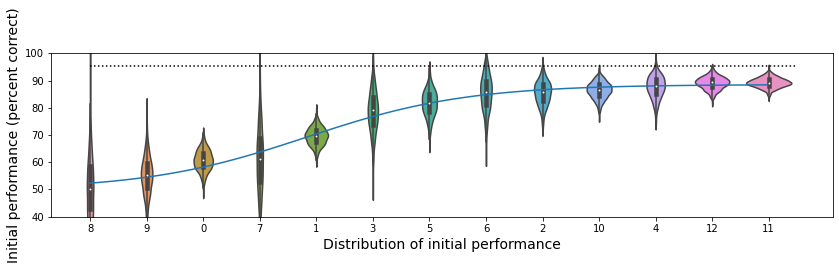

In [87]:
plt.figure(figsize=(14,3))
ax = sns.violinplot(x="rank", y="data", 
                    order = ['8',  '9',  '0',  '7',  '1',  '3',  '5',  '6',  '2', '10',  '4', '12', '11'],
                    data=df)
plt.ylim([0.4, 1])
plt.xlabel('Distribution of initial performance', fontsize=14)
plt.ylabel('Initial performance (percent correct)', fontsize=14)

plt.plot(X, y_fit)
plt.plot([0,12.5],[0.955,0.955],':k')
plt.yticks([0.4, 0.5,0.6,0.7,0.8,0.9,1],[40, 50,60,70,80,90,100])
plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/accuracy_rankorder_distribution.pdf')

Text(0, 0.5, 'Percent correct')

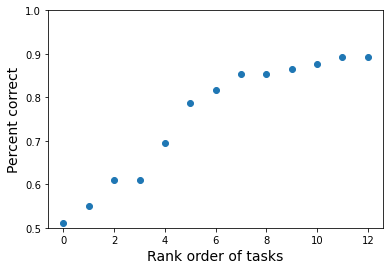

In [24]:
plt.scatter(np.arange(len(percent)), np.mean(P, axis=0))
plt.ylim([0.5, 1])
plt.xlabel('Rank order of tasks', fontsize=14)
plt.ylabel('Percent correct', fontsize=14)

In [27]:
percent_t

array([0.60754574, 0.69607808, 0.85745183, 0.78210746, 0.87625104,
       0.81776094, 0.85517698, 0.75064219, 0.95298993, 0.60870898,
       0.50892499, 0.55394863, 0.86444661, 0.8930046 , 0.89129678])

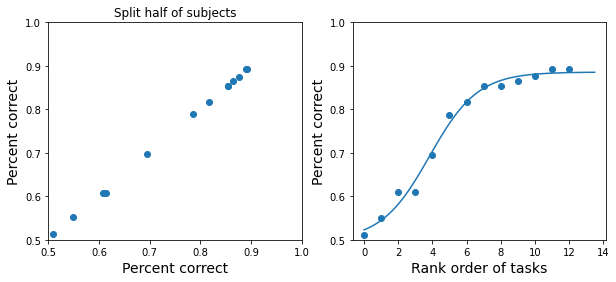

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(percent, percent_t)
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.title('Split half of subjects')
plt.xlabel('Percent correct', fontsize=14)
plt.ylabel('Percent correct', fontsize=14)

plt.subplot(122)
plt.scatter(np.arange(len(percent)), np.mean(P, axis=0))
plt.ylim([0.5, 1])
plt.xlabel('Rank order of tasks', fontsize=14)
plt.ylabel('Percent correct', fontsize=14)

plt.plot(X, y_fit)
#plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/accuracy_rankorder.pdf')

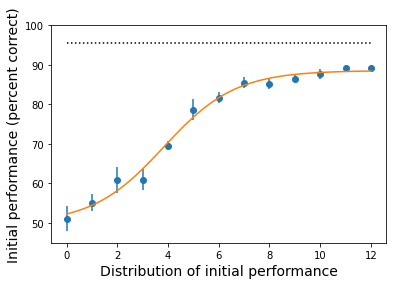

In [90]:
plt.figure()
plt.scatter(np.arange(len(percent)), np.mean(P, axis=0))
plt.errorbar(np.arange(len(percent)), np.mean(P, axis=0),yerr=np.std(P, axis=0)*10, linestyle="None")
plt.ylim([0.45, 1])
plt.xlabel('Distribution of initial performance', fontsize=14)
plt.ylabel('Initial performance (percent correct)', fontsize=14)

plt.plot(X, y_fit)
plt.plot([0,12],[0.955,0.955],':k')
plt.yticks([0.5,0.6,0.7,0.8,0.9,1],[50,60,70,80,90,100])
plt.savefig('/Users/xiaoxuanj/Dropbox/2015.paper.Jia.UnsupervisedLearning/supplemental/accuracy_rankorder_Fig6_err.pdf')

In [27]:
np.mean(P, axis=0)

array([0.51133922, 0.550936  , 0.60900721, 0.60953886, 0.69587956,
       0.7869375 , 0.81705789, 0.85464901, 0.85269897, 0.86502658,
       0.87600428, 0.89203605, 0.89292931])

In [26]:
import scipy.optimize as opt
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

ydata = np.mean(P, axis=0)
xdata = np.arange(len(percent))
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = opt.curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

In [81]:
X = np.linspace(0,12,100)
y_fit = sigmoid(X, *popt)


In [37]:
seq = np.arange(1000)
np.random.shuffle(seq)

In [65]:
max(y_fit)

0.9164712532879613

In [61]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])